# KNN Model (Updated)


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:

df = pd.read_csv("data.csv")
df = df.drop(columns=["id", "Unnamed: 32"])
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"].map({"M": 1, "B": 0}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (455, 30) Test size: (114, 30)


In [6]:

k_range = range(1, 16)
feature_range = [5, 10, 15, 20]
results = {}

for num_features in feature_range:
    scores_per_k = []
    for k in k_range:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_classif, k=num_features)),
            ("knn", KNeighborsClassifier(n_neighbors=k))
        ])
        scores = cross_val_score(pipe, X_train, y_train, cv=5)
        mean_score = scores.mean()
        scores_per_k.append(mean_score)
        results[(num_features, k)] = mean_score

best_combo = max(results, key=results.get)
best_features, best_k = best_combo
print(f"Best combination: {best_features} features, k={best_k}, CV Accuracy={results[best_combo]:.4f}")


Best combination: 20 features, k=7, CV Accuracy=0.9648


Test Accuracy: 0.9649122807017544


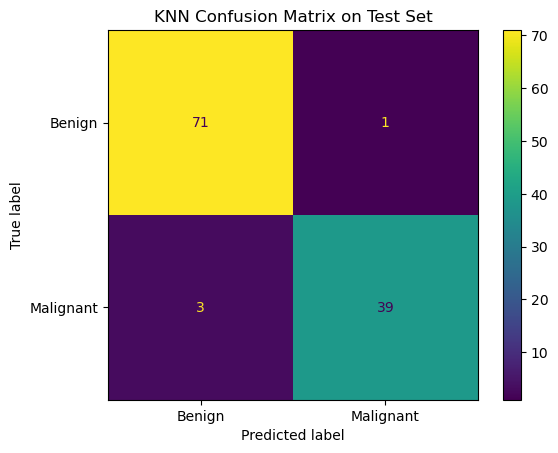

In [8]:

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_classif, k=best_features)),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.title("KNN Confusion Matrix on Test Set")
plt.show()
